In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

pd.set_option("max_columns", None)

In [5]:
listings_boston = pd.read_csv("./airbnb_boston/listings.csv")
listings_boston.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [6]:
def remove_special_char(df, col):
    '''
    Input
        df - Enter the name of dataframe holding the column that needs to be cleaned for special characters and converted
            to float
        col - Enter the name of column which needs to be cleaned for special characters
    
    Output
        A dataframe column removed with all special characters and converted to float for easy operations
    '''
    try:
        df[col] = df[col].str.extract(r'(\d+)').astype('float')
    except:
        'fail'
    return df[col].head(5)

In [7]:
cols = ['host_response_rate', 'host_acceptance_rate', 'price']

for col in cols:
    remove_special_char(listings_boston, col)

In [9]:
features = listings_boston[['host_listings_count', 'host_total_listings_count', 'accommodates', 
                             'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'number_of_reviews',
                             'review_scores_rating']]

In [11]:
for tf_feature in ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']:
    features[tf_feature] = listings_boston[tf_feature].map(lambda s: False if s == "f" else True)

<ipython-input-11-afe11949b238>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[tf_feature] = listings_boston[tf_feature].map(lambda s: False if s == "f" else True)


In [16]:
for col in features.columns[features.isnull().any()]:
    print(col)

In [15]:
for col in features.columns[features.isnull().any()]:
    features[col] = features[col].fillna(features[col].median())

<ipython-input-15-5c358c6015ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = features[col].fillna(features[col].median())


<AxesSubplot:>

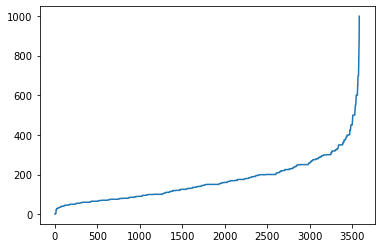

In [17]:
features['price'].sort_values().reset_index(drop=True).plot()

In [20]:
feature_filter_outlier = features.query('price <= 600')
feature_filter_outlier.head(1)

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,number_of_reviews,review_scores_rating,host_is_superhost,host_identity_verified,host_has_profile_pic,is_location_exact,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,1,1,4,1.5,2.0,3.0,250.0,1,0,94.0,False,False,True,True,False,False,False,False


In [27]:
lm_model = LinearRegression(normalize=True)
X = feature_filter_outlier[['host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
        'beds', 'guests_included', 'number_of_reviews', 'review_scores_rating', 'host_is_superhost',
     'host_identity_verified', 'host_has_profile_pic', 'is_location_exact', 'requires_license', 'instant_bookable',
     'require_guest_profile_picture', 'require_guest_phone_verification']]
y = feature_filter_outlier['price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [38]:
y_test.shape[0]

1068

In [28]:
lm_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [30]:
y_test_preds = lm_model.predict(X_test)

"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.4092017611702655 on 1068 values.'

In [42]:
import sklearn.metrics

mse = sklearn.metrics.mean_squared_error(y_test, y_test_preds)
rmse = mse**(1/2)
r_squared = sklearn.metrics.r2_score(y_test, y_test_preds)
"The MSE is {}, RMSE is {} and R2 is {}".format(mse, rmse, r_squared)

'The MSE is 6100.596169701493, RMSE is 78.10631325124425 and R2 is 0.4092017611702655'